# TASK - 02
# Perform data cleaning and exploratory data analysis (EDA)
# on a dataset of your choice, such as the Titanic dataset from
# Kaggle. Explore the relationships between variables and
# identify patterns and trends in the data.

# Sample Dataset :- https://www.kaggle.com/c/titanic/data

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
first_half_Titanic_data = pd.read_csv("C:/Users/PUNEET/Downloads/train.csv")
PassengerIDs = pd.read_csv("C:/Users/PUNEET/Downloads/gender_submission.csv")
test_data = pd.read_csv("C:/Users/PUNEET/Downloads/test.csv")

In [4]:
first_half_Titanic_data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
889,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
890,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S


In [3]:
second_half_Titanic_data = pd.merge(PassengerIDs, test_data, on = "PassengerId", how = "inner")
second_half_Titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
Titanic_data = pd.concat([first_half_Titanic_data, second_half_Titanic_data], ignore_index=True)

In [6]:
Titanic_data = Titanic_data.sort_values(by = 'PassengerId', ascending = True)
Titanic_data.reset_index(drop=True, inplace=True)
Titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
Titanic_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 890 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [ ]:
# features that strongly correlate with Age to group passengers and fill the median age within those groups.
# Extract the title from each name 
Titanic_data['Title'] = Titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#  Fill Age by Median of Group
def fill_age(Titanic_data):
    if pd.isnull(Titanic_data['Age']):
        return age_medians.loc[Titanic_data['Sex'], Titanic_data['Title'], Titanic_data['Pclass']]
    else:
        return Titanic_data['Age']
# Compute median ages for each group
age_medians = Titanic_data.groupby(['Sex', 'Title', 'Pclass'])['Age'].median()
Titanic_data['Age'] = Titanic_data.apply(fill_age, axis=1)

In [ ]:
Titanic_data['Age'].fillna(Titanic_data['Age'].median(), inplace = True)

In [ ]:
# Only 1 fare row is empty of Pclass 3
Titanic_data['Fare'].fillna(Titanic_data[Titanic_data['Pclass'] == 3]['Fare'].mean(),inplace = True)

In [10]:
#  drop a column with > 70% missing data
Titanic_data.drop(columns = 'Cabin',inplace = True)

In [ ]:
# Only 2 Embarked row is empty so fill by mode
most_common_embarked = Titanic_data['Embarked'].mode()[0]
Titanic_data['Embarked'].fillna(most_common_embarked, inplace = True)

In [16]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.270947,0.498854,0.385027,33.280206
std,378.020061,0.484918,0.837836,13.441188,1.041658,0.865560,51.741830
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
# Titanic_data[Titanic_data.duplicated()] #  If you want to see the duplicates (just in case):
Titanic_data.duplicated().sum()

np.int64(0)

In [13]:
print(Titanic_data['Sex'].unique())
print(Titanic_data['Embarked'].unique())
print(Titanic_data['Title'].unique())

['male' 'female']
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


In [19]:
Titanic_data['Embarked'].value_counts(),
Titanic_data['Pclass'].value_counts(),
Titanic_data['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

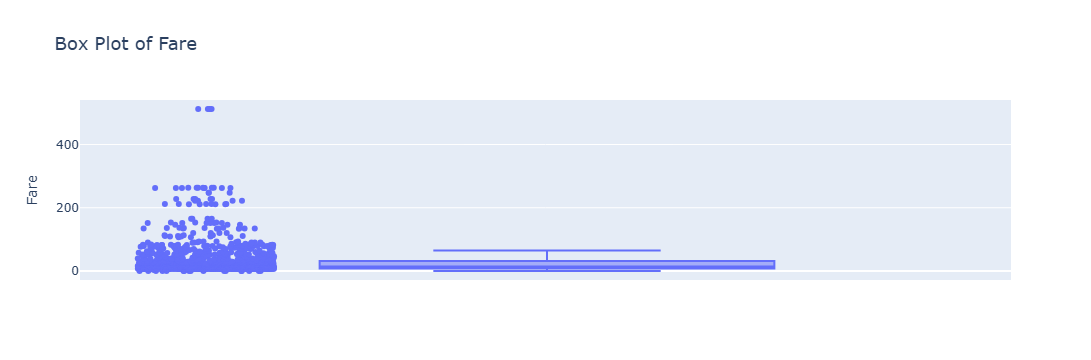

In [14]:
fig = px.box(
    Titanic_data,
    y='Fare',  # Use the column name as string
    title="Box Plot of Fare",
    points="all"  # Show all individual data points (optional)
)
fig.update_layout(
    yaxis_title="Fare",
    title_font_size=18
)
fig.show()

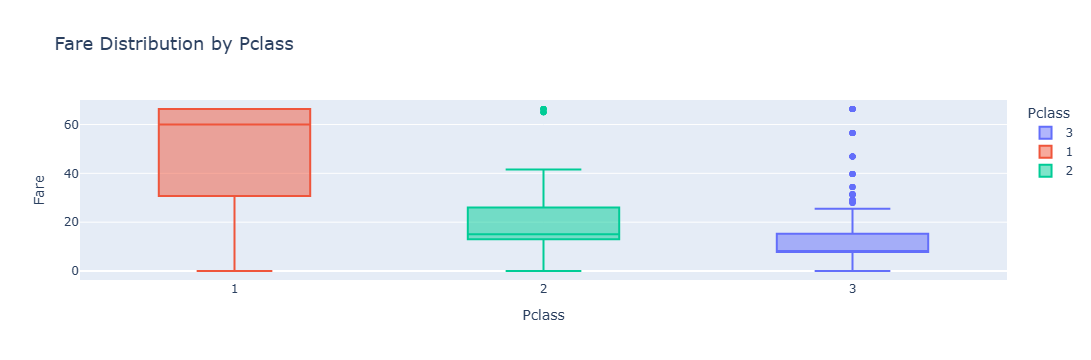

In [26]:
fig = px.box(
    Titanic_data,
    x='Pclass',
    y='Fare',
    color='Pclass',
    title="Fare Distribution by Pclass",
    points="outliers"
)
fig.update_layout(
    yaxis_title="Fare",
    title_font_size=18
)
fig.show()

In [15]:
Q1 = Titanic_data['Fare'].quantile(0.25)
Q3 = Titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
Min_range = Q1 - 1.5 * IQR 
Max_range = Q3 + 1.5 * IQR
Min_range, Max_range

(np.float64(-27.172999999999995), np.float64(66.34379999999999))

In [16]:
(Titanic_data['Fare'] > Max_range).sum()

np.int64(171)

In [23]:
Titanic_data['Fare'].count().sum()

np.int64(1309)

In [17]:
# Titanic_data = Titanic_data[Titanic_data['Fare'] <= Max_range] # remove outlier 
Titanic_data['Fare'] = Titanic_data['Fare'].apply(lambda x: min(x, Max_range)) # Replace outlier by max possible value

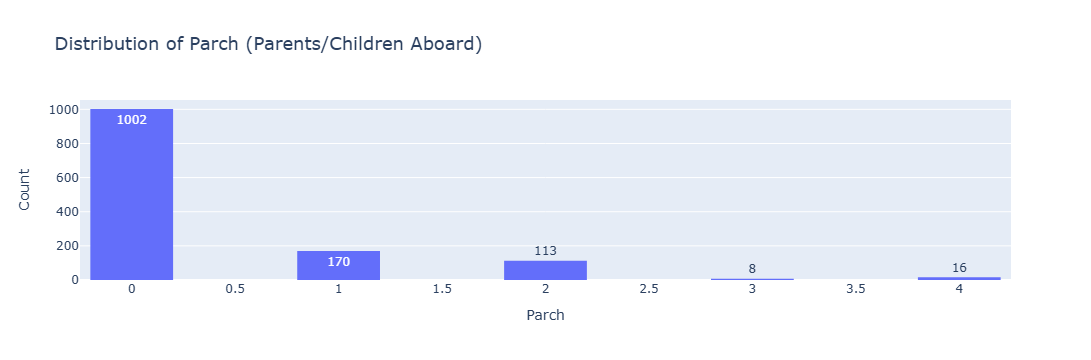

In [21]:
fig = px.histogram(
    Titanic_data,
    x='Parch',
    nbins=10,  # optional: control number of bins
    title='Distribution of Parch (Parents/Children Aboard)',
    labels={'Parch': 'Number of Parents/Children'},
    text_auto=True  # Show count labels on bars
)
fig.update_layout(
    yaxis_title='Count',
    xaxis_title='Parch',
    bargap=0.2,
    title_font_size=18
)
fig.show()


In [19]:
Titanic_data['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [20]:
# Titanic_data[Titanic_data['Parch'] >=5] # show records where Parch >= 5
Titanic_data.loc[Titanic_data['Parch'] >4, 'Parch'] = 4 # replace records where Parch >= 5 with 4 Parch

In [24]:
Titanic_data['Survived Status'] = Titanic_data['Survived'].map({0:"Not survived", 1: "Survived"})

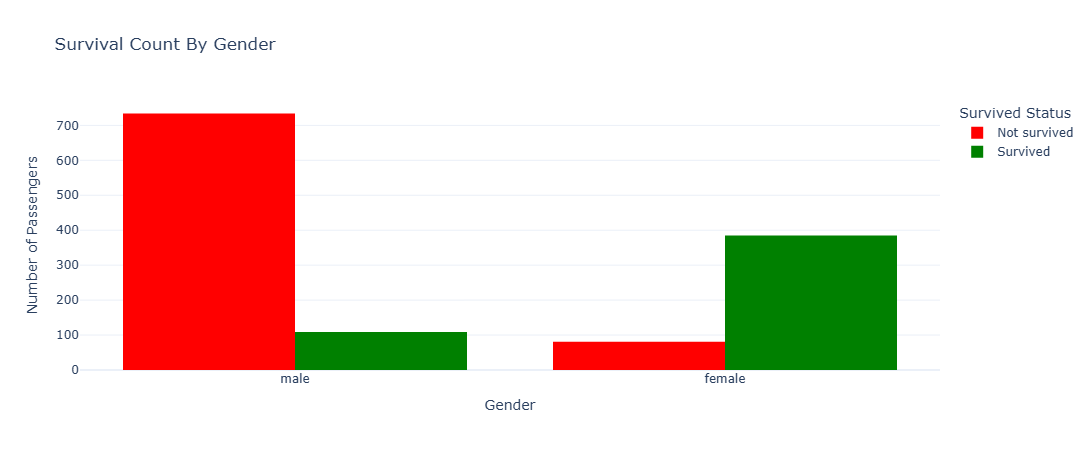

In [43]:
fig = px.histogram(
    Titanic_data,
    x = 'Sex',
    color = 'Survived Status',
    barmode = 'group',
    title = 'Survival Count By Gender',
    labels={'Sex': 'Gender', 'count': 'Passenger Count'},
    color_discrete_map={'Survived': 'green', 'Not survived': 'red'}
    
)
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Passengers',
    bargap=0.2,
    template='plotly_white',
    height = 450,
    width = 700
)
fig.show()

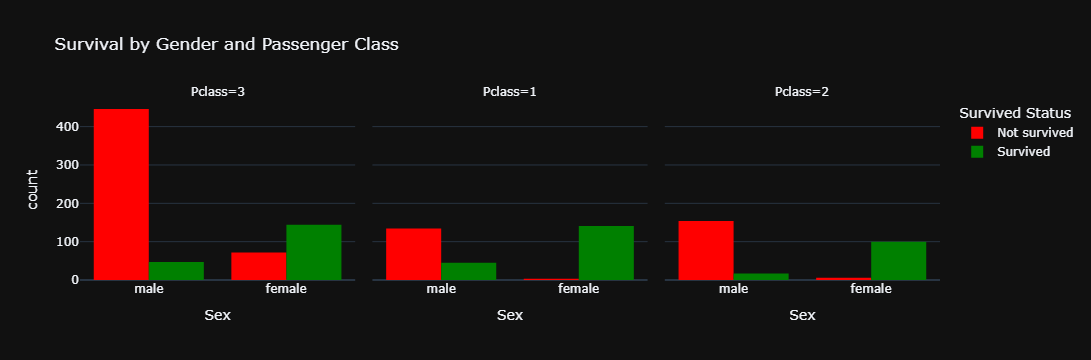

In [64]:
fig = px.histogram(
    Titanic_data, 
    x='Sex', 
    color='Survived Status',
    barmode='group',
    facet_col='Pclass',
    color_discrete_map={'Survived': 'green', 'Not survived': 'red'},
    title="Survival by Gender and Passenger Class"
)
fig.update_layout(
    bargap=0.2, 
    template='plotly_dark'
)
fig.show()


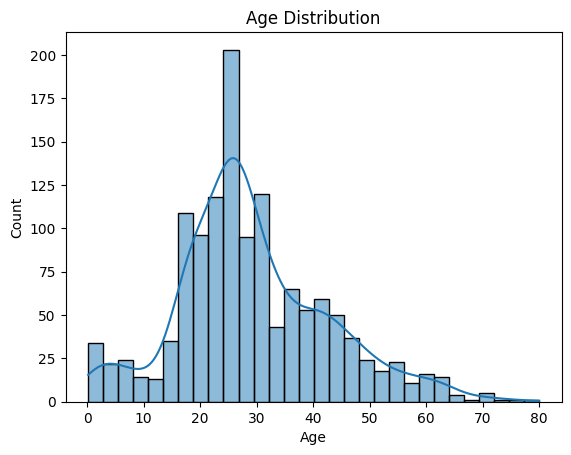

In [48]:
sns.histplot(Titanic_data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

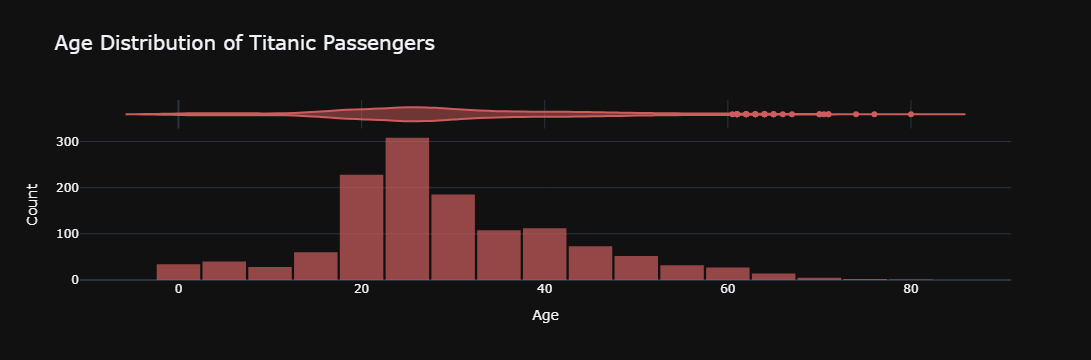

In [54]:
fig = px.histogram(
    Titanic_data, 
    x='Age',
    nbins=30,
    marginal='violin',  # adds a violin plot to show distribution shape
    opacity=0.7,
    color_discrete_sequence=['indianred'],
    title='Age Distribution of Titanic Passengers',
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    bargap=0.05,
    template='plotly_dark',
    title_font_size=20,
    showlegend=False
)

fig.show()


In [58]:
corr_matrix = Titanic_data.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.019407,-0.055224,-0.005769,0.014526
Survived,-0.020370,1.000000,-0.264710,-0.042296,0.002370,0.125969,0.280902
Pclass,-0.038354,-0.264710,1.000000,-0.453665,0.060832,0.003895,-0.726101
Age,0.019407,-0.042296,-0.453665,1.000000,-0.220038,-0.158190,0.241130
SibSp,-0.055224,0.002370,0.060832,-0.220038,1.000000,0.413497,0.321416
Parch,-0.005769,0.125969,0.003895,-0.158190,0.413497,1.000000,0.310580
Fare,0.014526,0.280902,-0.726101,0.241130,0.321416,0.310580,1.000000


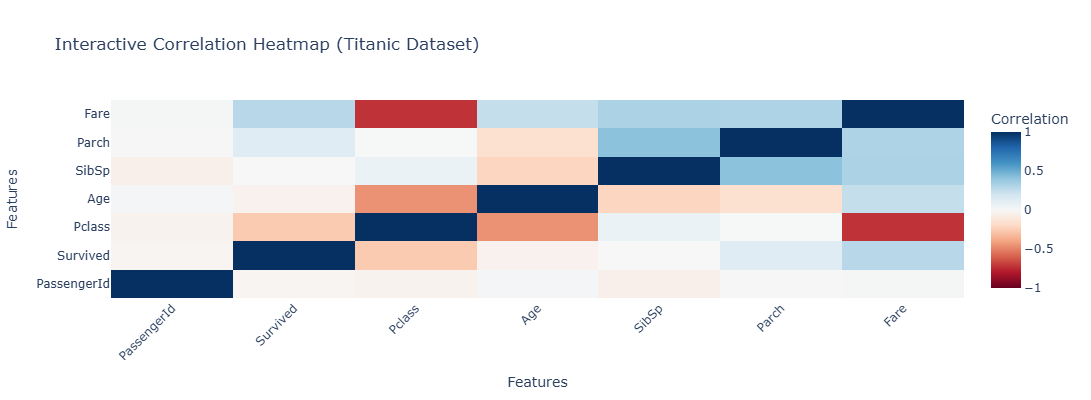

In [78]:
corr_matrix = Titanic_data.corr(numeric_only=True)

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdBu',  # or 'Viridis', 'Cividis', 'YlGnBu'
    zmin=-1, zmax=1,
    colorbar=dict(title="Correlation"),
    hoverongaps=False,
    text=corr_matrix.round(2).values,
    hovertemplate='Variable 1: %{x}<br>Variable 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>'
))

# Improve layout
fig.update_layout(
    title='Interactive Correlation Heatmap (Titanic Dataset)',
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_tickangle=-45,
    template="plotly_white",
    autosize=True,
    height=400,
    width = 600
)

fig.show()

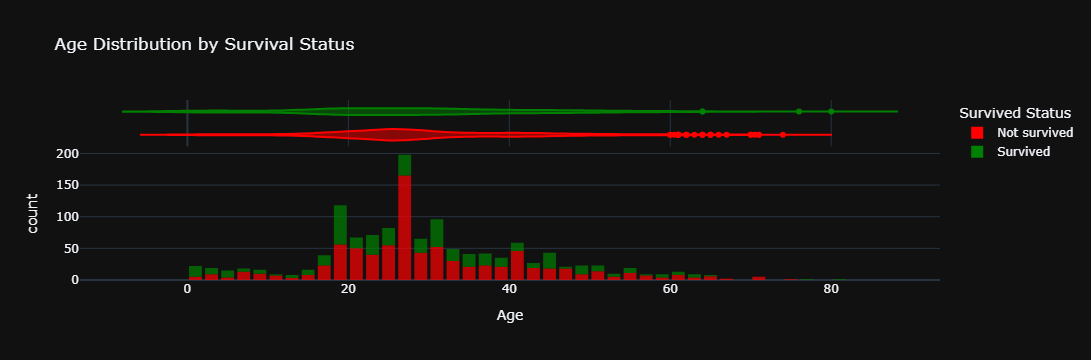

In [70]:
fig = px.histogram(
    Titanic_data, 
    x='Age', 
    color='Survived Status', 
    nbins=40,
    marginal='violin', 
    opacity=0.7,
    color_discrete_map={'Survived': 'green', 'Not survived': 'red'},
    title='Age Distribution by Survival Status'
)
fig.update_layout(
    template='plotly_dark',
    bargap=0.2, 
    
)
fig.show()


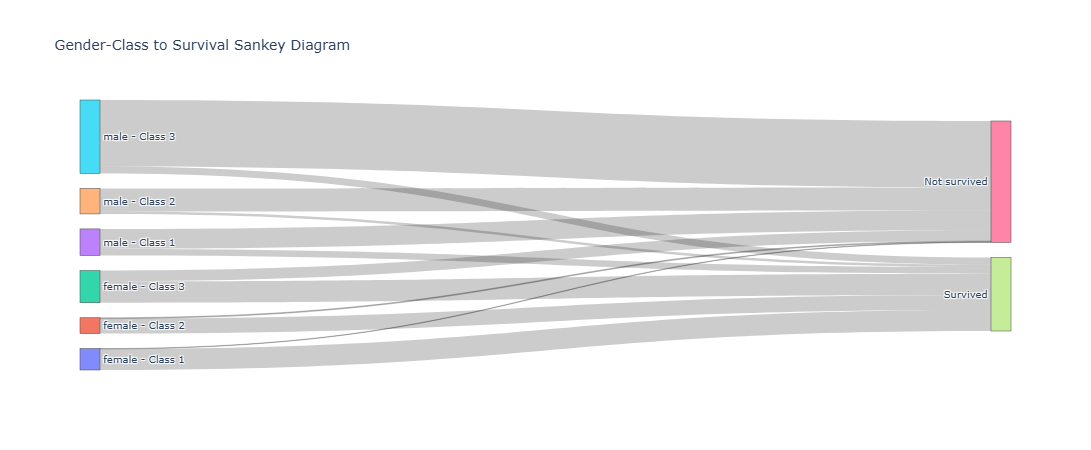

In [76]:
# Prepare data
grouped = Titanic_data.groupby(['Sex', 'Pclass', 'Survived Status']).size().reset_index(name='count')
grouped['Sex+Class'] = grouped['Sex'] + ' - Class ' + grouped['Pclass'].astype(str)

# Nodes
labels = list(grouped['Sex+Class'].unique()) + list(grouped['Survived Status'].unique())
source = [labels.index(row['Sex+Class']) for _, row in grouped.iterrows()]
target = [labels.index(row['Survived Status']) for _, row in grouped.iterrows()]
value = grouped['count'].tolist()

# Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(
    title_text="Gender-Class to Survival Sankey Diagram",
    font_size=10,
    height = 450
)
fig.show()

In [79]:
grouped

,Sex,Pclass,Survived Status,count,Sex+Class
0,female,1,Not survived,3,female - Class 1
1,female,1,Survived,141,female - Class 1
2,female,2,Not survived,6,female - Class 2
3,female,2,Survived,100,female - Class 2
4,female,3,Not survived,72,female - Class 3
5,female,3,Survived,144,female - Class 3
6,male,1,Not survived,134,male - Class 1
7,male,1,Survived,45,male - Class 1
8,male,2,Not survived,154,male - Class 2
9,male,2,Survived,17,male - Class 2


In [81]:
source, target, value

([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
 [6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7],
 [3, 141, 6, 100, 72, 144, 134, 45, 154, 17, 446, 47])